In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1.2, style='darkgrid')  # 解决Seaborn中文显示问题


In [22]:
df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df

,场地1,场地2,日期,货量
0,DC3,DC5,2021-01-01,3
1,DC3,DC10,2021-01-01,4
2,DC3,DC14,2021-01-01,4
3,DC5,DC3,2021-01-01,41
4,DC5,DC9,2021-01-01,3
...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479
177843,DC73,DC8,2022-12-31,150
177844,DC73,DC10,2022-12-31,8116
177845,DC73,DC14,2022-12-31,6139


In [23]:
df14dc10 = df[(df['场地1'] == 'DC14') & (df['场地2'] == 'DC10')]
df14dc10

,场地1,场地2,日期,货量
32,DC14,DC10,2021-01-01,273
271,DC14,DC10,2021-01-02,247
501,DC14,DC10,2021-01-03,160
741,DC14,DC10,2021-01-04,288
979,DC14,DC10,2021-01-05,188
...,...,...,...,...
176260,DC14,DC10,2022-12-27,28259
176588,DC14,DC10,2022-12-28,37386
176931,DC14,DC10,2022-12-29,23519
177255,DC14,DC10,2022-12-30,20311


In [24]:
df14dc10.dtypes

场地1            object
场地2            object
日期     datetime64[ns]
货量              int64
dtype: object

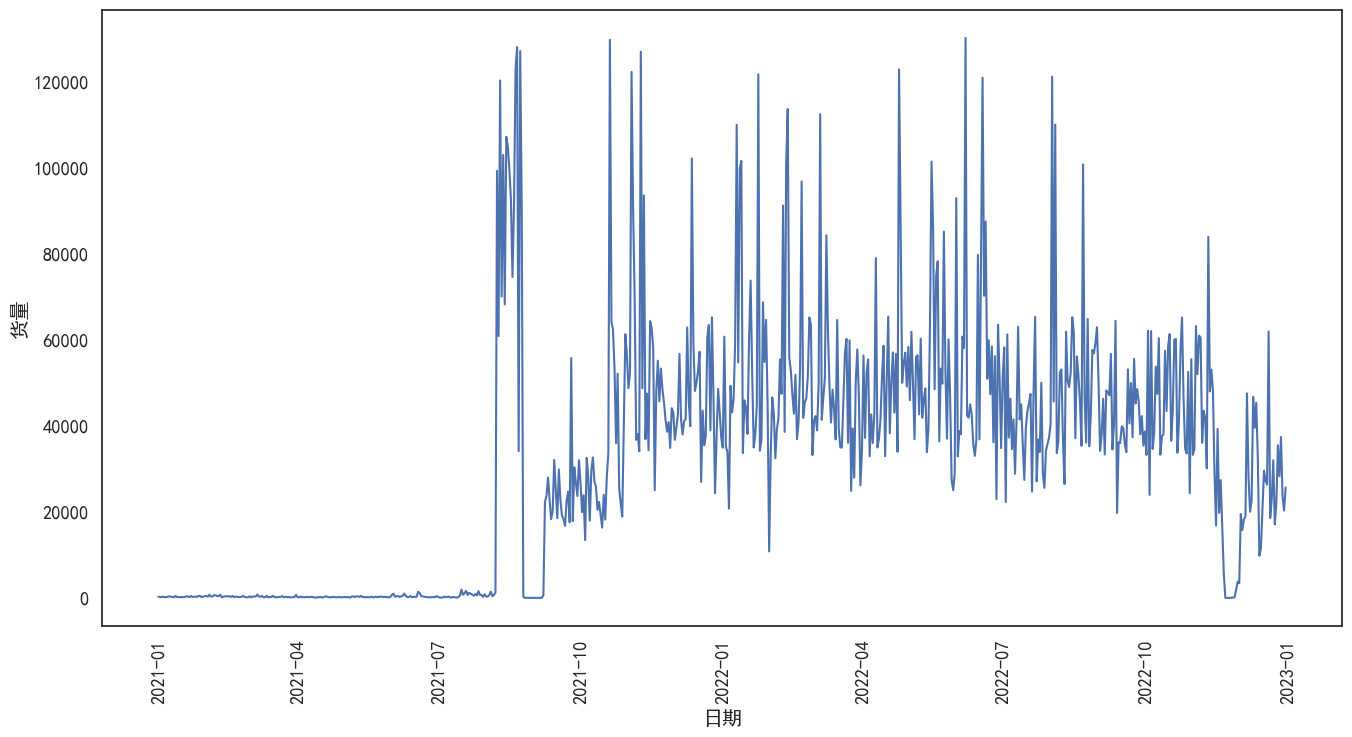

In [25]:
plt.figure(figsize=(16, 8))
sns.lineplot(df14dc10, x='日期', y='货量')
plt.xticks(rotation=90)
plt.show()

In [26]:
# 添加年份列
ddf = df.copy()
ddf['年份'] = ddf['日期'].dt.year
ddf['月日'] = df['日期'].dt.strftime('%m-%d')
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC3,DC5,2021-01-01,3,2021,01-01
1,DC3,DC10,2021-01-01,4,2021,01-01
2,DC3,DC14,2021-01-01,4,2021,01-01
3,DC5,DC3,2021-01-01,41,2021,01-01
4,DC5,DC9,2021-01-01,3,2021,01-01
...,...,...,...,...,...,...
177842,DC73,DC5,2022-12-31,2479,2022,12-31
177843,DC73,DC8,2022-12-31,150,2022,12-31
177844,DC73,DC10,2022-12-31,8116,2022,12-31
177845,DC73,DC14,2022-12-31,6139,2022,12-31


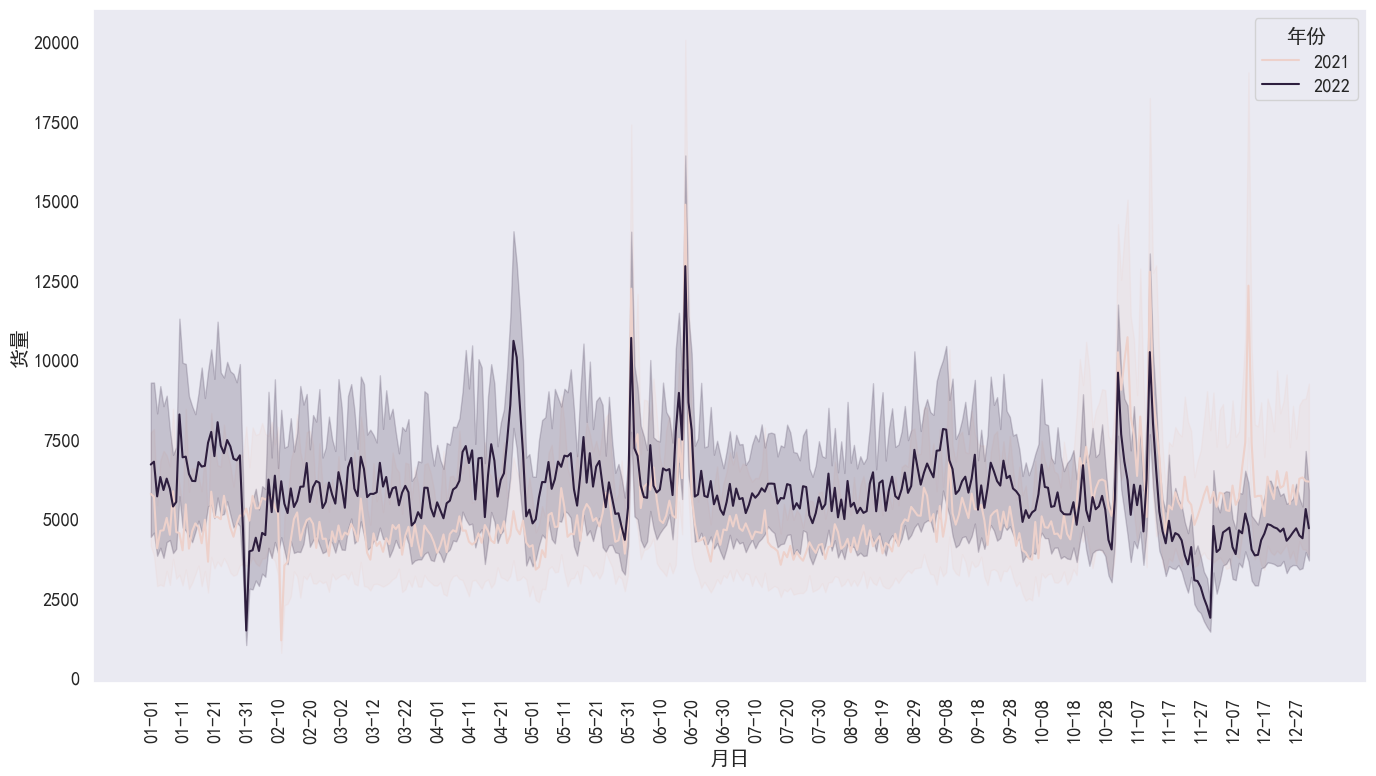

In [46]:
# 以年份为类目，按月份，全路线货量-置信区间折线图
# for style in ['darkgrid', 'whitegrid', 'white', 'dark']:
style = 'dark'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(ddf, x='月日', y='货量', hue='年份')

plt.xticks(ddf['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，全路线货量-置信区间折线图-{style}.svg')
plt.show()